In [57]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))

['train.csv', 'sampleSubmission.csv', 'test.csv']


In [58]:
import warnings
warnings.filterwarnings("ignore")

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import missingno as msno

%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)

In [60]:
# classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [61]:
# model selection
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# evaluation metrics: regression
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

# evaluation metrics: classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [62]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

df = train.copy()
test_df = test.copy()

In [63]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [64]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [66]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

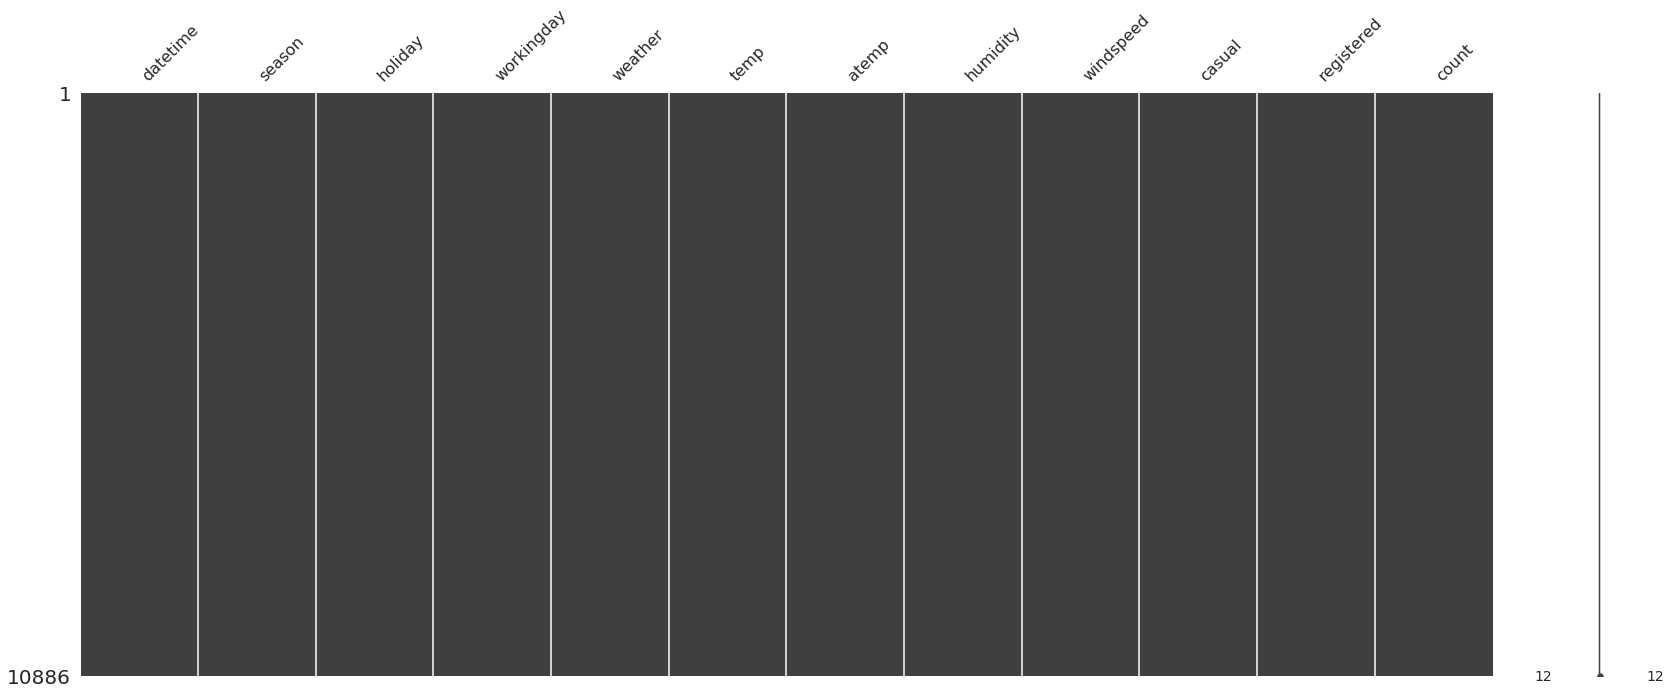

In [67]:
msno.matrix(df)

In [68]:
df['season'].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

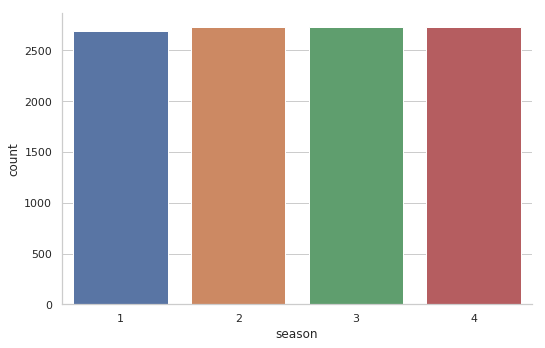

In [69]:
sns.factorplot(x='season', data=df, kind='count', size=5, aspect=1.5)

In [70]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

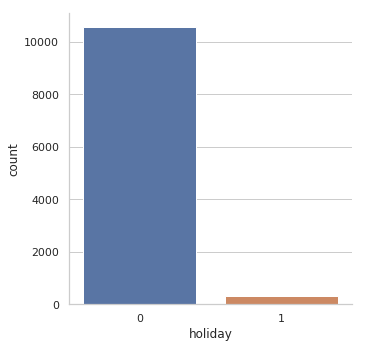

In [71]:
sns.factorplot(x='holiday', data=df, kind='count')

In [72]:
df["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

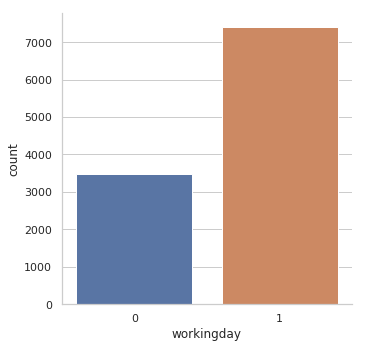

In [73]:
sns.factorplot(x='workingday', data=df, kind='count')

In [74]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

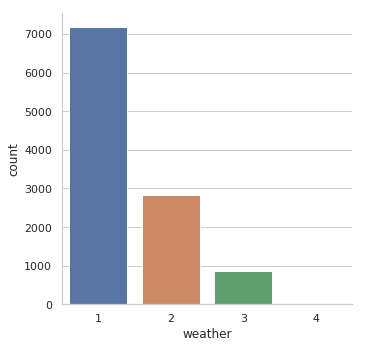

In [75]:
sns.factorplot(x='weather', data=df, kind='count')

In [76]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


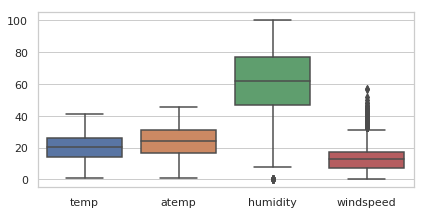

In [77]:
sns.boxplot(data=df[["temp",'atemp','humidity','windspeed']])
fig = plt.gcf()
fig.set_size_inches(6,3)

In [78]:
a = df['windspeed']
b = a[a > 17].value_counts()
b

19.0012    676
19.9995    492
22.0028    372
23.9994    274
26.0027    235
27.9993    187
30.0026    111
31.0009     89
32.9975     80
35.0008     58
39.0007     27
36.9974     22
43.0006     12
40.9973     11
43.9989      8
46.0022      3
56.9969      2
47.9988      2
51.9987      1
50.0021      1
Name: windspeed, dtype: int64

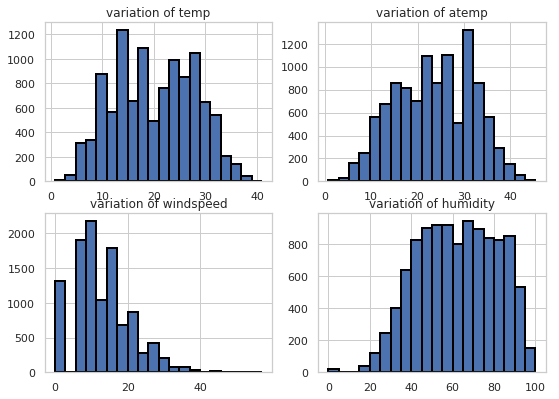

In [79]:
df.temp.unique()
fig, axes = plt.subplots(2,2)

axes[0,0].hist(x='temp', data=df, bins=20, edgecolor='black', linewidth=2)
axes[0,0].set_title('variation of temp')

axes[0,1].hist(x='atemp', data=df, bins=20, edgecolor='black', linewidth=2)
axes[0,1].set_title('variation of atemp')

axes[1,0].hist(x='windspeed', data=df, bins=20, edgecolor='black', linewidth=2)
axes[1,0].set_title('variation of windspeed')

axes[1,1].hist(x='humidity', data=df, bins=20, edgecolor='black', linewidth=2)
axes[1,1].set_title('variation of humidity')

fig.set_size_inches(8,6)

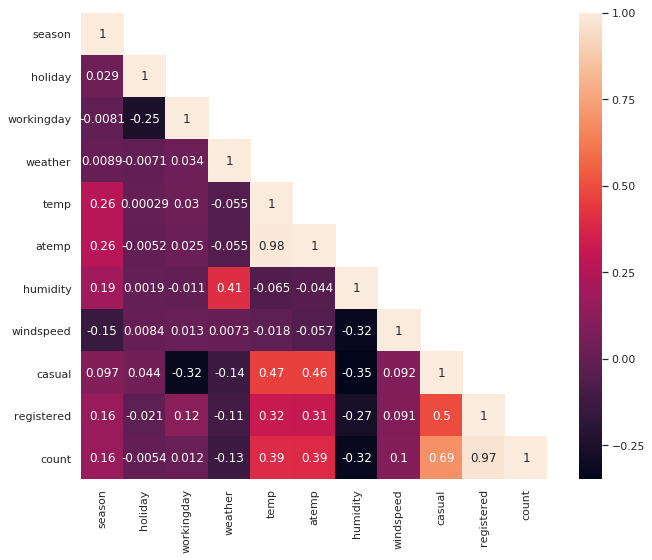

In [80]:
cor_mat = df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(10,8)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True)

In [81]:
season = pd.get_dummies(df['season'], prefix='season')
df = pd.concat([df,season], axis=1)

season = pd.get_dummies(df['season'], prefix='season')
test_df = pd.concat([test_df,season], axis=1)

In [82]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,0,0,0


In [83]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,1.0,0.0,1.0,1.0,10.66,11.365,56.0,26.0027,1,0,0,0
1,2011-01-20 01:00:00,1.0,0.0,1.0,1.0,10.66,13.635,56.0,0.0000,1,0,0,0
2,2011-01-20 02:00:00,1.0,0.0,1.0,1.0,10.66,13.635,56.0,0.0000,1,0,0,0
3,2011-01-20 03:00:00,1.0,0.0,1.0,1.0,10.66,12.880,56.0,11.0014,1,0,0,0
4,2011-01-20 04:00:00,1.0,0.0,1.0,1.0,10.66,12.880,56.0,11.0014,1,0,0,0


In [84]:
weather = pd.get_dummies(df['weather'], prefix='weather')
df = pd.concat([df,weather], axis=1)

weather = pd.get_dummies(df['weather'], prefix='weather')
test_df = pd.concat([test_df,weather], axis=1)

In [85]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,0,0,0,1,0,0,0


In [86]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,1.0,0.0,1.0,1.0,10.66,11.365,56.0,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1.0,0.0,1.0,1.0,10.66,13.635,56.0,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1.0,0.0,1.0,1.0,10.66,13.635,56.0,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1.0,0.0,1.0,1.0,10.66,12.880,56.0,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1.0,0.0,1.0,1.0,10.66,12.880,56.0,11.0014,1,0,0,0,1,0,0,0


In [87]:
df.drop(['season','weather'], inplace=True, axis=1)
test_df.drop(['season','weather'], inplace=True, axis=1)

In [88]:
df.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,1,0,0,0,1,0,0,0


In [89]:
test_df.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,0.0,1.0,10.66,11.365,56.0,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,0.0,1.0,10.66,13.635,56.0,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,0.0,1.0,10.66,13.635,56.0,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,0.0,1.0,10.66,12.880,56.0,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,0.0,1.0,10.66,12.880,56.0,11.0014,1,0,0,0,1,0,0,0


In [90]:
df["hour"] = [t.hour for t in pd.DatetimeIndex(df.datetime)]
df["day"] = [t.dayofweek for t in pd.DatetimeIndex(df.datetime)]
df["month"] = [t.month for t in pd.DatetimeIndex(df.datetime)]
df['year'] = [t.year for t in pd.DatetimeIndex(df.datetime)]
df['year'] = df['year'].map({2011:0, 2012:1})

In [91]:
df.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0,0,5,1,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0,1,5,1,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,1,0,0,0,1,0,0,0,2,5,1,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,1,0,0,0,1,0,0,0,3,5,1,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,1,0,0,0,1,0,0,0,4,5,1,0


In [92]:
test_df["hour"] = [t.hour for t in pd.DatetimeIndex(test_df.datetime)]
test_df["day"] = [t.dayofweek for t in pd.DatetimeIndex(test_df.datetime)]
test_df["month"] = [t.month for t in pd.DatetimeIndex(test_df.datetime)]
test_df['year'] = [t.year for t in pd.DatetimeIndex(test_df.datetime)]
test_df['year'] = test_df['year'].map({2011:0, 2012:1})

In [93]:
df.drop('datetime', axis=1, inplace=True)
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0,5,27,32,1,0,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0,3,10,13,1,0,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0,0,1,1,1,0,0,0,1,0,0,0,4,5,1,0


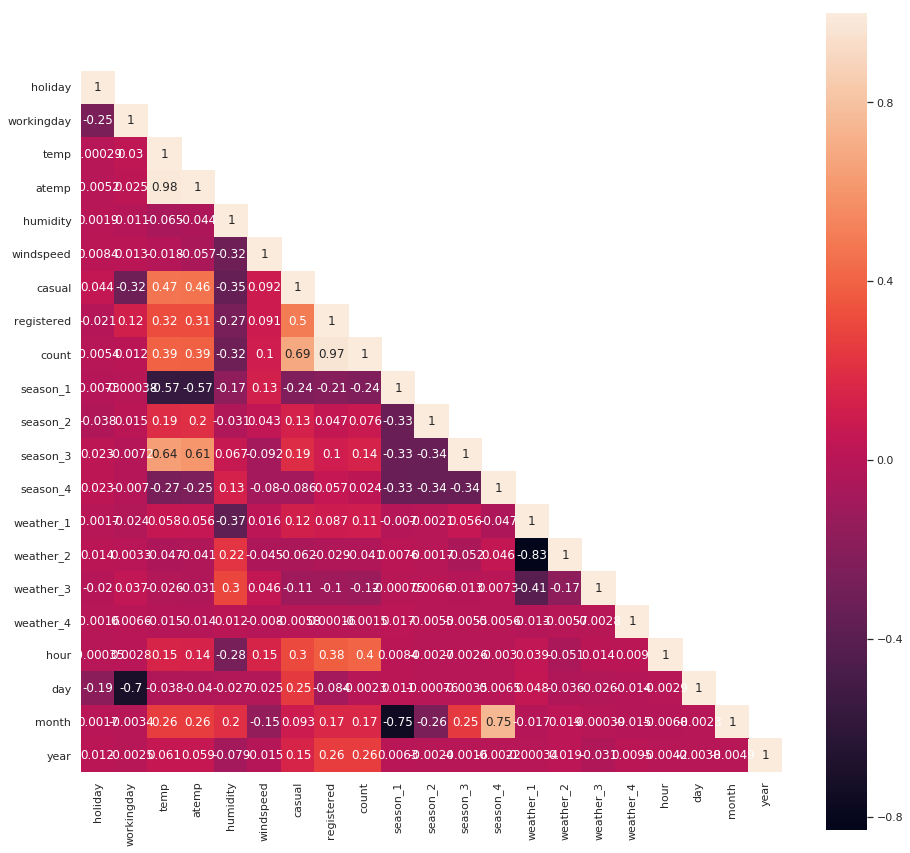

In [94]:
cor_mat = df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(14,14)
sns.heatmap(cor_mat, mask=mask, annot=True, cbar=True, square=True)

In [95]:
df.drop(['casual','registered'], inplace=True, axis=1)
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0,13,1,0,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0,1,1,0,0,0,1,0,0,0,4,5,1,0


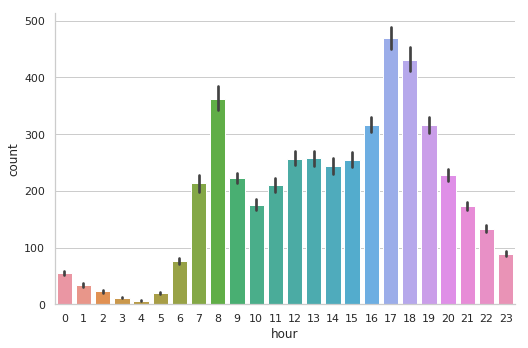

In [96]:
sns.factorplot(x='hour', y='count', data=df, kind='bar', size=5, aspect=1.5)

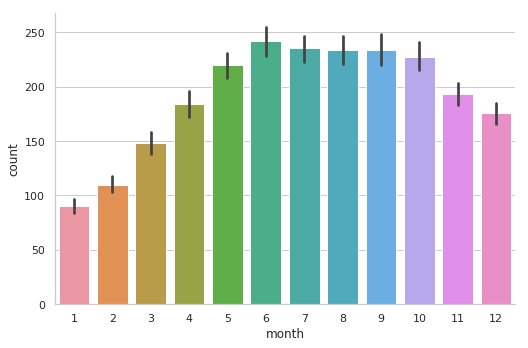

In [97]:
sns.factorplot(x='month', y='count', data=df, kind='bar', size=5, aspect=1.5)

In [98]:
new_df = df.copy()
new_df['temp_bin'] = np.floor(new_df['temp'])//5
new_df['temp_bin'].unique()

array([1., 2., 3., 0., 4., 5., 6., 7., 8.])

In [99]:
new_df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year,temp_bin
0,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,0,5,1,0,1.0
1,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,1,5,1,0,1.0
2,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,2,5,1,0,1.0
3,0,0,9.84,14.395,75,0.0,13,1,0,0,0,1,0,0,0,3,5,1,0,1.0
4,0,0,9.84,14.395,75,0.0,1,1,0,0,0,1,0,0,0,4,5,1,0,1.0


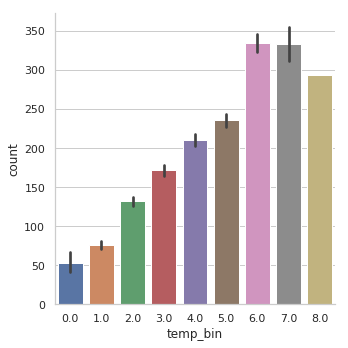

In [100]:
sns.factorplot(x='temp_bin', y='count', data=new_df, kind='bar')

In [101]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('uint8'): Index(['season_1', 'season_2', 'season_3', 'season_4', 'weather_1',
        'weather_2', 'weather_3', 'weather_4'],
       dtype='object'),
 dtype('int64'): Index(['holiday', 'workingday', 'humidity', 'count', 'hour', 'day', 'month',
        'year'],
       dtype='object'),
 dtype('float64'): Index(['temp', 'atemp', 'windspeed'], dtype='object')}

In [102]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('count',axis=1), df['count'], test_size=0.25, random_state=42)

In [106]:
models = [RandomForestRegressor(), AdaBoostRegressor(), BaggingRegressor(), SVR(), KNeighborsRegressor()]
model_names = ['RandomForestRegressor', 'AdaBoostRegressor', 'BaggingRegressor', 'SVR', 'KNeighborsRegressor']

rmsle = []
d = {}

for model in range(len(models)):
    clf = models[model]
    clf.fit(x_train, y_train)
    test_pred = clf.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred, y_test)))
    
d = {'Modeling Algorithm':model_names, 'RMSLE':rmsle}

In [107]:
d

{'Modeling Algorithm': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'RMSLE': [0.33765303743135583,
  1.0525182374886801,
  0.3360477437200538,
  1.4341690757701235,
  0.8616609594892403]}

In [108]:
rmsle_frame = pd.DataFrame(d)
rmsle_frame

,Modeling Algorithm,RMSLE
0,RandomForestRegressor,0.337653
1,AdaBoostRegressor,1.052518
2,BaggingRegressor,0.336048
3,SVR,1.434169
4,KNeighborsRegressor,0.861661


In [109]:
# lets tune a bit for random forest regression

params_dict = { 'n_estimators':[500], 'n_jobs':[-1], 'max_features':['auto','sqrt','log2'] }
clf_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params_dict, scoring='neg_mean_squared_log_error')

clf_rf.fit(x_train, y_train)
pred = clf_rf.predict(x_test)

print((np.sqrt(mean_squared_log_error(pred, y_test))))

0.3200204267043407


In [110]:
clf_rf.best_params_

{'max_features': 'auto', 'n_estimators': 500, 'n_jobs': -1}